<a href="https://colab.research.google.com/github/ytailab/hw1_M11323039/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A First Look at a Neural Network**

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
# 載入MNIST數據集，這是一個包含28x28灰階手寫數字圖片的標準數據集。
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 數據預處理
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數**

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=128)
# epochs=5：訓練 5 個回合（完整遍歷數據 5 次）。
# batch_size=128：每次更新權重時使用 128 筆數據，這樣能提高訓練效率。

test_loss_relu, test_acc_relu = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU test_acc:', test_acc_relu)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8754 - loss: 0.4179
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9694 - loss: 0.1007
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9816 - loss: 0.0606
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9885 - loss: 0.0386
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9910 - loss: 0.0300
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9782 - loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7     

**使用ReLU（Rectified Linear Unit）以及sigmoid作為激活函數**

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及sigmoid作為激活函數版本的模型
ReLU_model_2 = models.Sequential()
ReLU_model_2.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model_2.add(layers.Dense(10, activation='sigmoid'))

ReLU_model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model_2.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

test_loss_relu_2, test_acc_relu_2 = ReLU_model_2.evaluate(x_test, y_test)

y_pred = ReLU_model_2.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU_2 test_acc:', test_acc_relu_2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8765 - loss: 0.4177
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9691 - loss: 0.1032
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9816 - loss: 0.0596
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9916 - loss: 0.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0783
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.

**使用Softplus以及Softmax作為激活函數**

In [ ]:
# 建立 softplus 版本的模型
softplus_model = models.Sequential()
softplus_model.add(layers.Dense(1000, activation='softplus', input_shape=(28 * 28,)))
softplus_model.add(layers.Dense(10, activation='softmax'))
softplus_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練 ReLU 模型
softplus_model.fit(x_train, y_train, epochs=5, batch_size=128)
# epochs=5：訓練 5 個回合（完整遍歷數據 5 次）。
# batch_size=128：每次更新權重時使用 128 筆數據，這樣能提高訓練效率。

test_loss_softplus, test_acc_softplus = softplus_model.evaluate(x_test, y_test)

y_pred = softplus_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('softplus test_acc:', test_acc_softplus)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8070 - loss: 0.6527
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9267 - loss: 0.2498
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9509 - loss: 0.1673
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9636 - loss: 0.1222
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9700 - loss: 0.0977
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9648 - loss: 0.1099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7      

**使用Softplus以及Sigmoid作為激活函數**

In [ ]:
# 建立Sigmoid版本的模型
softplus_model_2 = models.Sequential()
softplus_model_2.add(layers.Dense(1000, activation='softplus', input_shape=(28 * 28,)))
softplus_model_2.add(layers.Dense(10, activation='sigmoid'))

softplus_model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練Sigmoid模型
softplus_model_2.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

test_loss_softplus_2, test_acc_softplus_2 = softplus_model_2.evaluate(x_test, y_test)

y_pred = softplus_model_2.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('softplus_2 test_acc:', test_acc_softplus_2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8097 - loss: 0.6360
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9253 - loss: 0.2534
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9507 - loss: 0.1675
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9624 - loss: 0.1251
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9708 - loss: 0.0978
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9630 - loss: 0.1181
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.98      0.96      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.94      0.98      0.96       892
           6       0.96      0.98      0.97       958
           7       0

**使用Sigmoid以及Softmax作為激活函數**

In [ ]:
# 建立Sigmoid版本的模型
sigmoid_model = models.Sequential()
sigmoid_model.add(layers.Dense(1000, activation='sigmoid', input_shape=(28 * 28,)))
sigmoid_model.add(layers.Dense(10, activation='softmax'))

sigmoid_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練Sigmoid模型
sigmoid_model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

test_loss_sigmoid, test_acc_sigmoid = sigmoid_model.evaluate(x_test, y_test)

y_pred = sigmoid_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('sigmoid test_acc:', test_acc_sigmoid)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8007 - loss: 0.7164
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9118 - loss: 0.3018
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9300 - loss: 0.2406
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9428 - loss: 0.1951
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9546 - loss: 0.1552
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9501 - loss: 0.1667
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.96      0.95       982
           5       0.93      0.96      0.94       892
           6       0.96      0.96      0.96       958
           7     

# **比較結果**

In [ ]:
print("\n==== Final Comparison ====")
print(f"ReLU & Softmax Accuracy: {test_acc_relu:.3f}, Loss: {test_loss_relu:.3f}")
print(f"ReLU & Sigmoid Accuracy: {test_acc_relu_2:.3f}, Loss: {test_loss_relu_2:.3f}")
print(f"Softplus & Softmax Accuracy: {test_acc_softplus:.3f}, Loss: {test_loss_softplus:.3f}")
print(f"Softplus & Sigmoid Accuracy: {test_acc_softplus_2:.3f}, Loss: {test_loss_softplus_2:.3f}")
print(f"Sigmoid & Softmax Accuracy: {test_acc_sigmoid:.3f}, Loss: {test_loss_sigmoid:.3f}")


==== Final Comparison ====
ReLU & Softmax Accuracy: 0.981, Loss: 0.064
ReLU & Sigmoid Accuracy: 0.981, Loss: 0.065
Softplus & Softmax Accuracy: 0.970, Loss: 0.096
Softplus & Sigmoid Accuracy: 0.969, Loss: 0.100
Sigmoid & Softmax Accuracy: 0.957, Loss: 0.146


MINST改隱藏層層數、神經元數量

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(500, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=128)
# epochs=5：訓練 5 個回合（完整遍歷數據 5 次）。
# batch_size=128：每次更新權重時使用 128 筆數據，這樣能提高訓練效率。

test_loss_relu, test_acc_relu = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU test_acc:', test_acc_relu)

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=128)
# epochs=5：訓練 5 個回合（完整遍歷數據 5 次）。
# batch_size=128：每次更新權重時使用 128 筆數據，這樣能提高訓練效率。

test_loss_relu, test_acc_relu = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU test_acc:', test_acc_relu)

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=128)
# epochs=5：訓練 5 個回合（完整遍歷數據 5 次）。
# batch_size=128：每次更新權重時使用 128 筆數據，這樣能提高訓練效率。

test_loss_relu, test_acc_relu = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU test_acc:', test_acc_relu)

**使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數，改epoch 及
batch_size**

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=128)

test_loss_relu_0, test_acc_relu_0 = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU_e5_b_128 test_acc:', test_acc_relu_0)#50s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8736 - loss: 0.4163
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9699 - loss: 0.1002
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9807 - loss: 0.0629
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9870 - loss: 0.0416
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9917 - loss: 0.0274
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7      

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=10, batch_size=128)
# 原本epochs=5，batch_size=128

test_loss_relu_1, test_acc_relu_1 = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU_e10_b_128 test_acc:', test_acc_relu_1)#92s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8730 - loss: 0.4235
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9693 - loss: 0.1012
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9802 - loss: 0.0645
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9878 - loss: 0.0407
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9917 - loss: 0.0282
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9944 - loss: 0.0208
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9961 - loss: 0.0138
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9974 - loss: 0.0101
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9981 - loss: 0.0072
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9991 - loss: 0.0045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0785
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
         

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=5, batch_size=64)
# 原本epochs=5，batch_size=128

test_loss_relu_2, test_acc_relu_2 = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU_e5_b_64 test_acc:', test_acc_relu_2)#88s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8917 - loss: 0.3522
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9749 - loss: 0.0828
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9840 - loss: 0.0518
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9884 - loss: 0.0369
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9928 - loss: 0.0240
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9784 - loss: 0.0743
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7    

In [ ]:
# 建立使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數版本的模型
ReLU_model = models.Sequential()
ReLU_model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
ReLU_model.add(layers.Dense(10, activation='softmax'))
ReLU_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
ReLU_model.fit(x_train, y_train, epochs=10, batch_size=64)
# 原本epochs=5，batch_size=128

test_loss_relu_3, test_acc_relu_3 = ReLU_model.evaluate(x_test, y_test)

y_pred = ReLU_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 生成報告
print(classification_report(y_true, y_pred_classes))
print('ReLU_e10_b_64 test_acc:', test_acc_relu_3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8979 - loss: 0.3425
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9737 - loss: 0.0866
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9840 - loss: 0.0512
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9879 - loss: 0.0376
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9920 - loss: 0.0238
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9949 - loss: 0.0172
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9964 - loss: 0.0120
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9977 - loss: 0.0083
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9985 - loss: 0.0063
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9992 - loss: 0.0041
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.0776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
   

# **比較結果**

In [ ]:
print("\n==== Final Comparison ====")
print('ReLU_e5_b_128 test_acc:', test_acc_relu_0, 'Loss:', test_loss_relu_0)
print('ReLU_e10_b_128 test_acc:', test_acc_relu_1, 'Loss:', test_loss_relu_1)
print('ReLU_e5_b_64 test_acc:', test_acc_relu_2, 'Loss:', test_loss_relu_2)
print('ReLU_e10_b_64 test_acc:', test_acc_relu_3, 'Loss:', test_loss_relu_3)


==== Final Comparison ====
ReLU_e5_b_128 test_acc: 0.9807000160217285 Loss: 0.06390731781721115
ReLU_e10_b_128 test_acc: 0.982200026512146 Loss: 0.06409638375043869
ReLU_e5_b_64 test_acc: 0.9817000031471252 Loss: 0.06252378225326538
ReLU_e10_b_64 test_acc: 0.9839000105857849 Loss: 0.06389173120260239


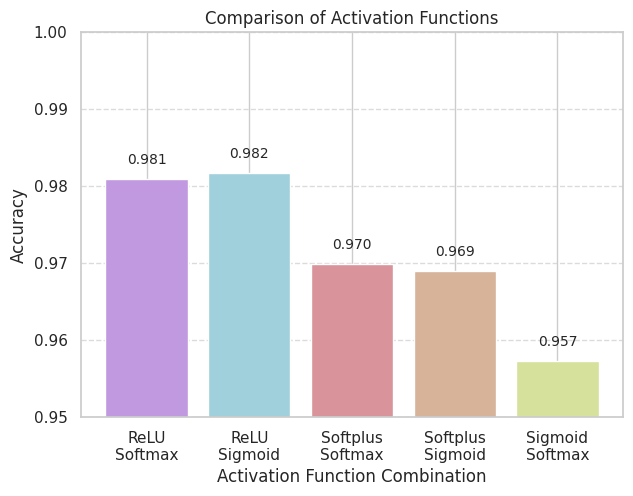

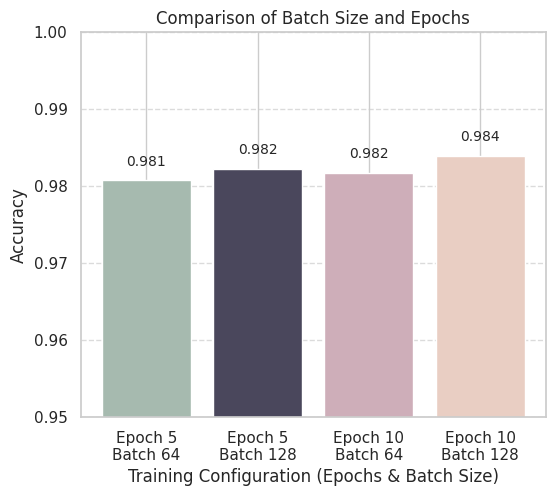

In [ ]:
import matplotlib.pyplot as plt

activation_results = {
    "ReLU\nSoftmax": test_acc_relu,
    "ReLU\nSigmoid": test_acc_relu_2,
    "Softplus\nSoftmax": test_acc_softplus,
    "Softplus\nSigmoid": test_acc_softplus_2,
    "Sigmoid\nSoftmax": test_acc_sigmoid
}

batch_results = {
    "Epoch 5\nBatch 64": test_acc_relu_0,
    "Epoch 5\nBatch 128": test_acc_relu_1,
    "Epoch 10\nBatch 64": test_acc_relu_2,
    "Epoch 10\nBatch 128": test_acc_relu_3
}

# 🔹 第一張圖：激活函數比較 (XY 軸對調)
def plot_activation_comparison(activation_results):
    plt.figure(figsize=(7, 5))
    keys = list(activation_results.keys())
    values = list(activation_results.values())

    plt.bar(keys, values, color=['#C199E0', '#A0D0DC', '#D9939B', '#D7B399', '#D6E19C'])
    plt.ylabel("Accuracy")  # Y 軸改為準確率
    plt.xlabel("Activation Function Combination")  # X 軸改為激活函數組合
    plt.title("Comparison of Activation Functions")
    plt.ylim(0.95, 1)  # 限制 Y 軸範圍
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 顯示數值
    for index, value in enumerate(values):
        plt.text(index, value + 0.002, f"{value:.3f}", ha='center', fontsize=10)

    plt.show()

# 🔹 第二張圖：Batch Size & Epochs 比較 (XY 軸對調)
def plot_batch_comparison(batch_results):
    plt.figure(figsize=(6, 5))
    keys = list(batch_results.keys())
    values = list(batch_results.values())

    plt.bar(keys, values, color=['#A6BAAF', '#4A475C', '#CEAEB9', '#E9CEC3'])
    plt.ylabel("Accuracy")  # Y 軸改為準確率
    plt.xlabel("Training Configuration (Epochs & Batch Size)")  # X 軸改為 Batch & Epochs
    plt.title("Comparison of Batch Size and Epochs")
    plt.ylim(0.95, 1)  # 限制 Y 軸範圍
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 顯示數值
    for index, value in enumerate(values):
        plt.text(index, value + 0.002, f"{value:.3f}", ha='center', fontsize=10)

    plt.show()

# 產生兩張圖
plot_activation_comparison(activation_results)
plot_batch_comparison(batch_results)


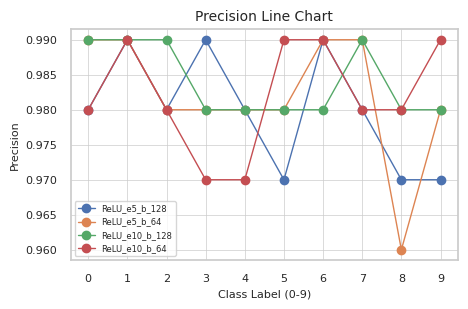

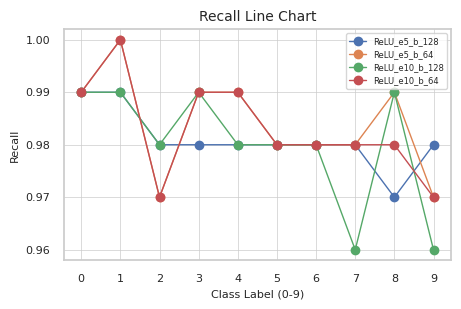

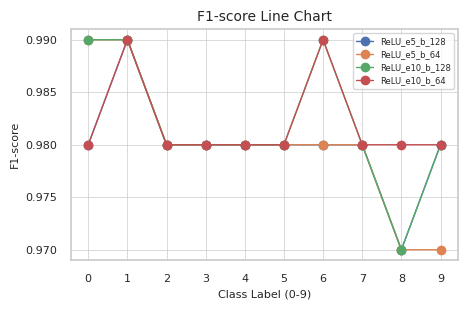

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定義類別（0-9）和模型
categories = list(range(10))  # 數字 0-9 代表類別
models = ["ReLU_e5_b_128", "ReLU_e5_b_64", "ReLU_e10_b_128", "ReLU_e10_b_64"]

# Precision、Recall、F1-score 的數據（來自你的輸出）
precision_values = np.array([
    [0.98, 0.99, 0.98, 0.99, 0.98, 0.97, 0.99, 0.98, 0.97, 0.97],
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.96, 0.98],
    [0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.98],
    [0.98, 0.99, 0.98, 0.97, 0.97, 0.99, 0.99, 0.98, 0.98, 0.99]
])

recall_values = np.array([
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.98],
    [0.99, 1.00, 0.97, 0.99, 0.99, 0.98, 0.98, 0.98, 0.99, 0.97],
    [0.99, 0.99, 0.98, 0.99, 0.98, 0.98, 0.98, 0.96, 0.99, 0.96],
    [0.99, 1.00, 0.97, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.97]
])

f1_values = np.array([
    [0.98, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.98],
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97],
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98],
    [0.98, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.98, 0.98]
])

# 設置 Seaborn 樣式
sns.set(style="whitegrid")

# 折線圖繪製函數
def plot_line_chart(data, title, ylabel):
    plt.figure(figsize=(5, 3))  # 圖片大小變為 1/4
    for i, model in enumerate(models):
        plt.plot(categories, data[i], marker='o', label=model, linewidth=1)  # 線條變細
    plt.title(title, fontsize=10)
    plt.xlabel("Class Label (0-9)", fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    plt.xticks(categories, fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=6)
    plt.grid(True, linewidth=0.5)  # 網格線變細
    plt.show()

# 繪製 Precision、Recall、F1-score 折線圖
plot_line_chart(precision_values, "Precision Line Chart", "Precision")
plot_line_chart(recall_values, "Recall Line Chart", "Recall")
plot_line_chart(f1_values, "F1-score Line Chart", "F1-score")


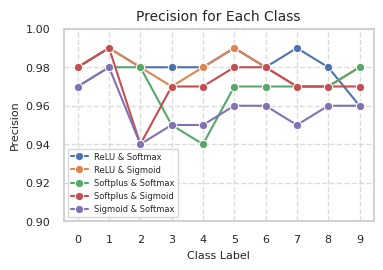

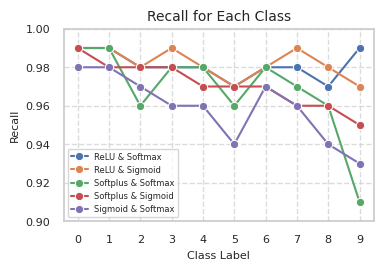

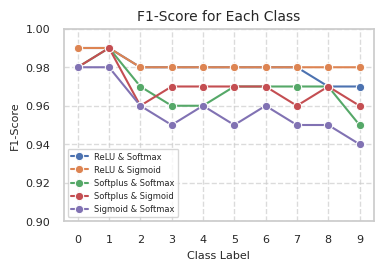

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 各組實驗的名稱
activation_functions = ["ReLU & Softmax", "ReLU & Sigmoid", "Softplus & Softmax", "Softplus & Sigmoid", "Sigmoid & Softmax"]

# 10 個類別的索引
categories = np.arange(10)

# Precision, Recall, F1-Score 數據
precision_data = np.array([
    [0.98, 0.99, 0.98, 0.98, 0.98, 0.99, 0.98, 0.99, 0.98, 0.96],
    [0.98, 0.99, 0.98, 0.97, 0.98, 0.99, 0.98, 0.97, 0.97, 0.98],
    [0.97, 0.98, 0.98, 0.95, 0.94, 0.97, 0.97, 0.97, 0.97, 0.98],
    [0.98, 0.99, 0.94, 0.97, 0.97, 0.98, 0.98, 0.97, 0.97, 0.97],
    [0.97, 0.98, 0.94, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96]
])

recall_data = np.array([
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.97, 0.98, 0.98, 0.97, 0.99],
    [0.99, 0.99, 0.98, 0.99, 0.98, 0.97, 0.98, 0.99, 0.98, 0.97],
    [0.99, 0.99, 0.96, 0.98, 0.98, 0.96, 0.98, 0.97, 0.96, 0.91],
    [0.99, 0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.96, 0.96, 0.95],
    [0.98, 0.98, 0.97, 0.96, 0.96, 0.94, 0.97, 0.96, 0.94, 0.93]
])

f1_score_data = np.array([
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97],
    [0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98],
    [0.98, 0.99, 0.97, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.95],
    [0.98, 0.99, 0.96, 0.97, 0.97, 0.97, 0.97, 0.96, 0.97, 0.96],
    [0.98, 0.98, 0.96, 0.95, 0.96, 0.95, 0.96, 0.95, 0.95, 0.94]
])

# 繪製折線圖的函數 (放大尺寸 & 設定 Y 軸刻度)
def plot_metric(data, title, ylabel):
    plt.figure(figsize=(4, 2.5))  # 放大 1 倍
    for i in range(5):
        sns.lineplot(x=categories, y=data[i], marker="o", label=activation_functions[i])

    plt.xticks(categories, labels=[str(i) for i in categories], fontsize=8)  # 調整字體大小
    plt.yticks([1, 0.98, 0.96, 0.94, 0.92, 0.9], fontsize=8)  # 設定 Y 軸刻度
    plt.xlabel("Class Label", fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    plt.title(title, fontsize=10)
    plt.legend(loc="lower left", fontsize=6)  # 調整圖例大小
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# 繪製 Precision, Recall, F1-Score 折線圖
plot_metric(precision_data, "Precision for Each Class", "Precision")
plot_metric(recall_data, "Recall for Each Class", "Recall")
plot_metric(f1_score_data, "F1-Score for Each Class", "F1-Score")


# **The Boston Housing Price dataset**

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
# 對訓練數據正規化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
import pandas as pd
df=pd.DataFrame(train_data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
None


In [ ]:
from keras import models
from keras import layers

In [ ]:
def build_model():
   model = models.Sequential()
   # 添加第一層（隱藏層）
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   # input_shape=(train_data.shape[1],)：輸入大小，對應13個特徵（因為 train_data.shape[1]=13）。
   # 添加第二層（隱藏層）
   model.add(layers.Dense(64, activation='relu'))
   # 添加輸出層
   model.add(layers.Dense(1))
   #------------------------------------------------------------------------
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   # optimizer='rmsprop'：使用 RMSprop 優化器，適合回歸問題，並能有效調整學習率。
   # loss='mse'：使用 均方誤差（MSE, Mean Squared Error）作為損失函數，因為這是回歸問題。
   # metrics=['mae']：使用平均絕對誤差（MAE, Mean Absolute Error） 作為評估指標。
   # MAE = |預測值 - 真實值|，比MSE更直觀（因為MSE會放大大誤差的影響）。
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.3602 - mae: 2.4566
2.684988021850586
19.268354415893555


In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],)))  # 改為 Sigmoid
   model.add(layers.Dense(64, activation='sigmoid'))  # 改為 Sigmoid
   model.add(layers.Dense(1))  # 輸出層不使用激活函數
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mape'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score, test_mae_score ,test_mape_score= model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)
print(test_mape_score)

In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='softplus', input_shape=(train_data.shape[1],)))  # 改為 Sigmoid
   model.add(layers.Dense(64, activation='softplus'))  # 改為 Sigmoid
   model.add(layers.Dense(1))  # 輸出層不使用激活函數
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)

**使用ReLU（Rectified Linear Unit）以及Softmax作為激活函數**

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='softmax'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_0, test_mae_score_0 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_0 = np.sqrt(test_mse_score_0)

print(test_mae_score_0)
print(test_mse_score_0)
print(test_rmse_score_0)

**使用ReLU（Rectified Linear Unit）以及sigmoid作為激活函數**

In [ ]:

def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_1, test_mae_score_1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1 = np.sqrt(test_mse_score_1)

print(test_mae_score_1)
print(test_mse_score_1)
print(test_rmse_score_1)

**使用Softplus以及Softmax作為激活函數**

In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='softplus', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='softmax'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_2, test_mae_score_2= model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_2 = np.sqrt(test_mse_score_2)

print(test_mae_score_2)
print(test_mse_score_2)
print(test_rmse_score_2)

**使用Softplus以及Sigmoid作為激活函數**

In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='softplus', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_3, test_mae_score_3 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_3 = np.sqrt(test_mse_score_3)

print(test_mae_score_3)
print(test_mse_score_3)
print(test_rmse_score_3)

**使用Sigmoid以及Softmax作為激活函數**

In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='softmax'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_4, test_mae_score_4 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_4 = np.sqrt(test_mse_score_4)

print(test_mae_score_4)
print(test_mse_score_4)
print(test_rmse_score_4)

# **結果比較(激活函數)**

In [ ]:
print("\n====== Final MAE Comparison ======")
print(f"Relu_SoftMax_MAE: {test_mae_score_0:.3f}")
print(f"Relu_Sigmoid_MAE: {test_mae_score_1:.3f}")
print(f"SoftPlus_SoftMax_MAE: {test_mae_score_2:.3f}")
print(f"SoftPlus_Sigmoid_MAE: {test_mae_score_3:.3f}")
print(f"Sigmoid_SoftMax_MAE: {test_mae_score_4:.3f}")

In [ ]:
print("\n====== Final MSE Comparison ======")
print(f"Relu_SoftMax_MSE: {test_mse_score_0:.3f}")
print(f"Relu_Sigmoid_MSE: {test_mse_score_1:.3f}")
print(f"SoftPlus_SoftMax_MSE: {test_mse_score_2:.3f}")
print(f"SoftPlus_Sigmoid_MSE: {test_mse_score_3:.3f}")
print(f"Sigmoid_SoftMax_MSE: {test_mse_score_4:.3f}")

In [ ]:
print("\n====== Final RMSE Comparison ======")
print(f"Relu_SoftMax_RMSE: {test_rmse_score_0:.3f}")
print(f"Relu_Sigmoid_RMSE: {test_rmse_score_1:.3f}")
print(f"SoftPlus_SoftMax_RMSE: {test_rmse_score_2:.3f}")
print(f"SoftPlus_Sigmoid_RMSE: {test_rmse_score_3:.3f}")
print(f"Sigmoid_SoftMax_RMSE: {test_rmse_score_4:.3f}")

# **MAE比較圖表**

In [ ]:
import matplotlib.pyplot as plt

# 模型名稱
models = ["Relu_SoftMax", "Relu_Sigmoid", "SoftPlus_SoftMax", "SoftPlus_Sigmoid", "Sigmoid_SoftMax"]

# MAE 數值
mae_scores = [test_mae_score_0, test_mae_score_1, test_mae_score_2, test_mae_score_3, test_mae_score_4]

# 畫長條圖
plt.figure(figsize=(8, 5))
plt.bar(models, mae_scores, color=['#A6BAAF', '#4A475C', '#CEAEB9', '#E9CEC3'])

# 加標籤
plt.xlabel("Model Activation Functions")
plt.ylabel("MAE Score")
plt.title("MAE Comparison of Different Models")
plt.ylim(min(mae_scores) * 0.9, max(mae_scores) * 1.1)  # 調整 Y 軸範圍
plt.xticks(rotation=30)  # 旋轉 X 軸標籤，避免重疊

# 顯示數值在長條上
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

# **MSE比較圖表**

In [ ]:
import matplotlib.pyplot as plt

# 模型名稱
models = ["Relu_SoftMax", "Relu_Sigmoid", "SoftPlus_SoftMax", "SoftPlus_Sigmoid", "Sigmoid_SoftMax"]

# MSE 數值
mse_scores = [test_mse_score_0, test_mse_score_1, test_mse_score_2, test_mse_score_3, test_mse_score_4]

# 畫長條圖
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color=['#A6BAAF', '#4A475C', '#CEAEB9', '#E9CEC3'])

# 加標籤
plt.xlabel("Model Activation Functions")
plt.ylabel("MSE Score")
plt.title("MSE Comparison of Different Models")
plt.ylim(min(mse_scores) * 0.9, max(mse_scores) * 1.1)  # 調整 Y 軸範圍
plt.xticks(rotation=30)  # 旋轉 X 軸標籤，避免重疊

# 顯示數值在長條上
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

# **rmse比較圖**

In [ ]:
import matplotlib.pyplot as plt

# 模型名稱
models = ["Relu_SoftMax", "Relu_Sigmoid", "SoftPlus_SoftMax", "SoftPlus_Sigmoid", "Sigmoid_SoftMax"]

# MSE 數值
mse_scores = [test_rmse_score_0, test_rmse_score_1, test_rmse_score_2, test_rmse_score_3, test_rmse_score_4]

# 畫長條圖
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color=['#A6BAAF', '#4A475C', '#CEAEB9', '#E9CEC3'])

# 加標籤
plt.xlabel("Model Activation Functions")
plt.ylabel("RMSE Score")
plt.title("RMSE Comparison of Different Models")
plt.ylim(min(mse_scores) * 0.9, max(mse_scores) * 1.1)  # 調整 Y 軸範圍
plt.xticks(rotation=30)  # 旋轉 X 軸標籤，避免重疊

# 顯示數值在長條上
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

# **rulu sigmoid 改epoch batch_size**

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)#原本
# verbose=0：不顯示訓練過程。
test_mse_score_1_test0, test_mae_score_1_test0 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1_test0 = np.sqrt(test_mae_score_1_test0)

print(test_mae_score_1_test0)
print(test_mse_score_1_test0)
print(test_rmse_score_1_test0)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.7997 - mae: 2.5904
2.796489715576172
19.557300567626953
1.672270826025549


In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=64, verbose=0)#改batch_size
# verbose=0：不顯示訓練過程。
test_mse_score_1_test1, test_mae_score_1_test1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1_test1 = np.sqrt(test_mae_score_1_test1)

print(test_mae_score_1_test1)
print(test_mse_score_1_test1)
print(test_rmse_score_1_test1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.4384 - mae: 3.6211  
3.928086042404175
35.44390869140625
1.9819399694249509


In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=160, batch_size=16, verbose=0)#改epochs batch_size
# verbose=0：不顯示訓練過程。
test_mse_score_1_test2, test_mae_score_1_test2 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1_test2 = np.sqrt(test_mae_score_1_test2)

print(test_mae_score_1_test2)
print(test_mse_score_1_test2)
print(test_rmse_score_1_test2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5190 - mae: 2.2984 
2.4583449363708496
15.879172325134277
1.567911010348116


In [ ]:
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=160, batch_size=64, verbose=0)#改epochs batch_size
# verbose=0：不顯示訓練過程。
test_mse_score_1_test3, test_mae_score_1_test3 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1_test3 = np.sqrt(test_mae_score_1_test3)

print(test_mae_score_1_test3)
print(test_mse_score_1_test3)
print(test_rmse_score_1_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.6427 - mae: 2.6344 
2.827049732208252
18.859254837036133
1.6813832793888048


# **更改隱藏層**

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_1, test_mae_score_1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1 = np.sqrt(test_mse_score_1)

print(test_mae_score_1)
print(test_mse_score_1)
print(test_rmse_score_1)

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],))) #128
   model.add(layers.Dense(128, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_1, test_mae_score_1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1 = np.sqrt(test_mse_score_1)

print(test_mae_score_1)
print(test_mse_score_1)
print(test_rmse_score_1)

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) #64四層
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(64, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_1, test_mae_score_1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1 = np.sqrt(test_mse_score_1)

print(test_mae_score_1)
print(test_mse_score_1)
print(test_rmse_score_1)

In [ ]:
import numpy as np
def build_model():
   model = models.Sequential()
   model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],))) #128四層
   model.add(layers.Dense(128, activation='sigmoid'))
   model.add(layers.Dense(128, activation='sigmoid'))
   model.add(layers.Dense(128, activation='sigmoid'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   return model

model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
# verbose=0：不顯示訓練過程。
test_mse_score_1, test_mae_score_1 = model.evaluate(test_data, test_targets)
# 計算 RMSE
test_rmse_score_1 = np.sqrt(test_mse_score_1)

print(test_mae_score_1)
print(test_mse_score_1)
print(test_rmse_score_1)